# Home insulation system

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
temp = pd.read_csv("file:///C:/Users/Salam Saudagar/Desktop/Temp_Alaska/alaska_temp.csv", sep=';')

In [3]:
#####===== Formuale to determine the HTC of outside air
def HTC_out(v):
    return(10.45 - v + 10*np.sqrt(v)/2)

In [24]:
#####===== To calculate the heat required to maintain the Temperature of the system to 25 deg C
# Let's consider 10*10*10 room, 1 ft = 0.3048 m
# 859.85 Kcal/hr == 1 KW
def heat_in_KW(T, K, V):
    RT = 25 
    Q_KW = V*(RT-T)*K/859.85
    return(Q_KW)

'''
Basic formula: How to calculate the heating requirements

V x ΔT x K = Q kcal/h

V – Volume of area to be heated (Width x length x height) in m3.

ΔT – Difference between the external temperature and the desired internal temperature (in°C).

K – Dispersion coeffi cient.
K=3.0-4.0  a simple building in wood or in corrugated metal - non insulated.

K=2.0-2.9 Simple construction, single brick layer, simple windows, simple roof - Poorly insulated.

K=1.0-1.9 Standard construction, double brick layer, few windows, standard closed roof - Moderately insulated.

K=0.6-0.9 advanced construction, double insulated brick, few double pain windows, thick pavement foundation,
well insulated roofing materials - Well insulated.

'''

In [ ]:
#####===== Calculating the Temperature 
# Thermal conductiivty of wodden material k = 0.12 w/(m*K)
# Thickness of the wall is 0.15 m / 15 cm

In [49]:
K = 3.5 # Dispersion coefficient wood
V = 3.048*3.048*3.048 # Volume of the room

k = 0.12 # wodden material
t = 0.15
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 3.048*3.048 # Area of wall

outside_temp = []
heat_required = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    # Heat required to maintain the Temperature
    Q = heat_in_KW(T, K, V)
    # HTC of outer portion
    h_out = HTC_out(temp['Wind Speed  [10 m above gnd]'][i])
    heat_required.append(Q)
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out))/A
    basement_temp.append(T3)

In [50]:
# plt.plot(list(range(temp_instances)), heat_required, 'r') # plotting t, a separately 
# plt.plot(list(range(temp_instances)), outside_temp, 'g')
# plt.xlabel('Instanses')
# plt.ylabel('outside_temp')
# plt.show()
def plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Instances')
    ax1.set_ylabel('heat_required(KW)', color='r')
    ax1.plot(list(range(temp_instances)), heat_required, 'r')
    ax1.tick_params(axis='y',labelcolor='r')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('outside_temp degC', color='g')
    ax2.plot(list(range(temp_instances)), outside_temp, 'g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    plt.plot(list(range(temp_instances)), top_temp, 'b') # plotting t, b separately 
    plt.plot(list(range(temp_instances)), basement_temp, 'g') # plotting t, c separately 
    plt.xlabel('Instanses')
    plt.ylabel('top_temp and basement_temp degC')
    plt.legend(('top_temp', 'basement_temp'), shadow=True)
    plt.show()

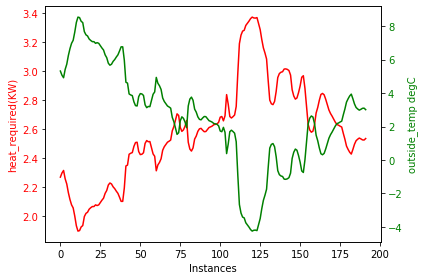

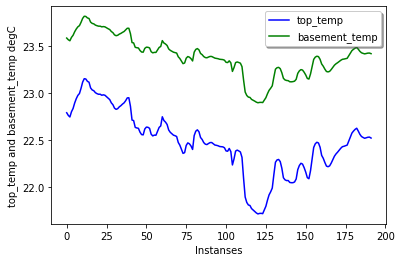

In [51]:
plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp)

1. For Change in material of the wall:- We can use 'Double Insulated brick' instead of wooden wall 

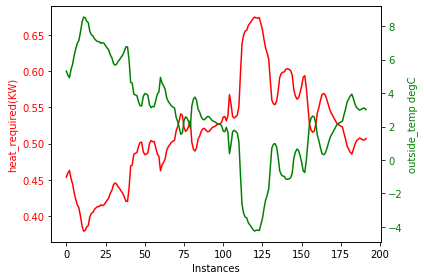

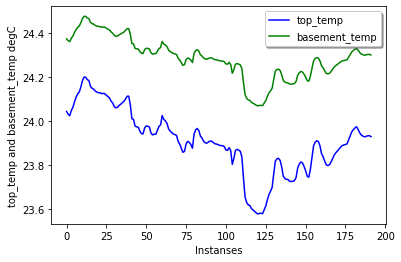

In [41]:
K = 0.7 # Dispersion coefficient (Double Insulated bricks)
V = 3.048*3.048*3.048 # Volume of the room

k = 0.05 # Double Brick material
t = 0.15
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 3.048*3.048 # Area of wall

outside_temp = []
heat_required = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    # Heat required to maintain the Temperature
    Q = heat_in_KW(T, K, V)
    # HTC of outer portion
    h_out = HTC_out(temp['Wind Speed  [10 m above gnd]'][i])
    heat_required.append(Q)
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out))/A
    basement_temp.append(T3)
    
plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp)

2. Change the volume of the home, Check how the heating requirement will change

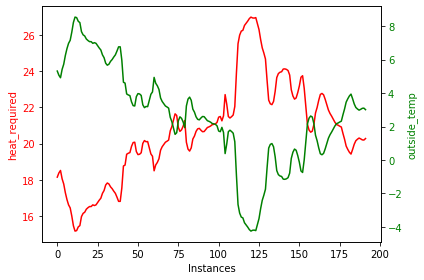

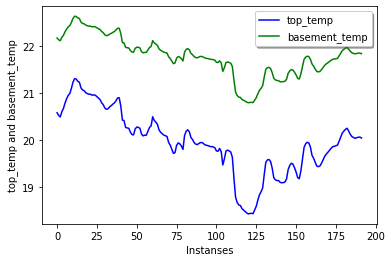

In [39]:
K = 3.5 # Dispersion coefficient wood
V = 8*3.048*3.048*3.048 # Volume of the room

k = 0.12 # wodden material
t = 0.15
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 4*3.048*3.048 # Area of wall

outside_temp = []
heat_required = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    # Heat required to maintain the Temperature
    Q = heat_in_KW(T, K, V)
    # HTC of outer portion
    h_out = HTC_out(temp['Wind Speed  [10 m above gnd]'][i])
    heat_required.append(Q)
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out))/A
    basement_temp.append(T3)
    
plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp)

3. Increase the thickness of wall

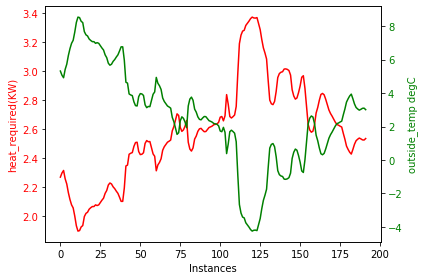

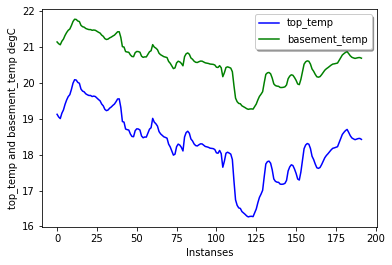

In [48]:
K = 3.5 # Dispersion coefficient wood
V = 3.048*3.048*3.048 # Volume of the room

k = 0.12 # wodden material
t = 0.15*3
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 3.048*3.048 # Area of wall

outside_temp = []
heat_required = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    # Heat required to maintain the Temperature
    Q = heat_in_KW(T, K, V)
    # HTC of outer portion
    h_out = HTC_out(temp['Wind Speed  [10 m above gnd]'][i])
    heat_required.append(Q)
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out))/A
    basement_temp.append(T3)
    
plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp)

4. Velocity of air increases suddenly by twice and that will be contineous

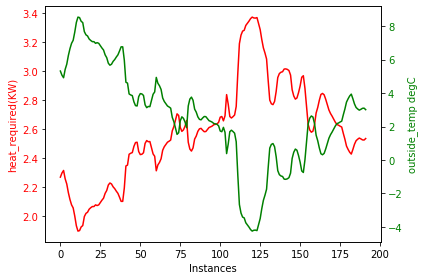

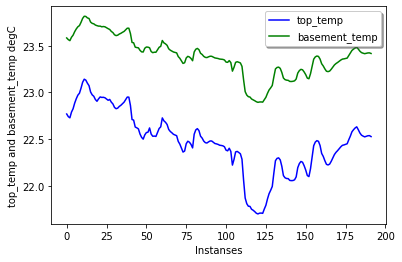

In [52]:
K = 3.5 # Dispersion coefficient wood
V = 3.048*3.048*3.048 # Volume of the room

k = 0.12 # wodden material
t = 0.15
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 3.048*3.048 # Area of wall

outside_temp = []
heat_required = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    # Heat required to maintain the Temperature
    Q = heat_in_KW(T, K, V)
    # HTC of outer portion
    h_out = HTC_out(3*temp['Wind Speed  [10 m above gnd]'][i])
    heat_required.append(Q)
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out))/A
    basement_temp.append(T3)
    
plots(temp_instances,heat_required,outside_temp,top_temp,basement_temp)

5. What if I provide a constant amount of heat rather than maintaining Temperature of the Room to 25 deg C?

In [57]:
def Room_temp(T):
    K = 3.5 # Dispersion coefficient wood
    V = 3.048*3.048*3.048 # Volume of the room
    Q = 2.5*859.85 # 2.5KW
    RT = (Q/(K*V)) + T
    return(RT)

k = 0.12 # wodden material
t = 0.15
h1 = h2 = 10
T1 = 25 # Temperature that need to be maintained in the room.
A = 3.048*3.048 # Area of wall

outside_temp = []
room_temp = []
top_temp = []
basement_temp = []
temp_instances = temp.shape[0]
for i in range(temp_instances):
    # Outside Temperature
    T = temp['Temperature  [2 m above gnd]'][i]
    outside_temp.append(T)
    T1 = Room_temp(T)
    room_temp.append(T1)
    Q = 2.5
    # HTC of outer portion
    h_out = HTC_out(temp['Wind Speed  [10 m above gnd]'][i])
    T2 = T1 - 6*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    top_temp.append(T2)
    T3 = T1 - 4*Q*((1/h1)+ (t/k)+(1/h2) + (1/h_out) )/A
    basement_temp.append(T3)

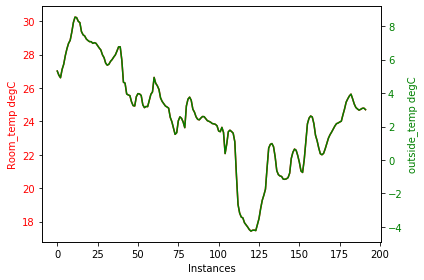

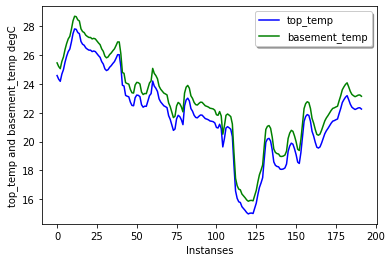

In [60]:
def plots(temp_instances,room_temp,outside_temp,top_temp,basement_temp):
    fig, ax1 = plt.subplots()
    ax1.set_xlabel('Instances')
    ax1.set_ylabel('Room_temp degC', color='r')
    ax1.plot(list(range(temp_instances)), room_temp, 'r')
    ax1.tick_params(axis='y',labelcolor='r')

    ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

    ax2.set_ylabel('outside_temp degC', color='g')
    ax2.plot(list(range(temp_instances)), outside_temp, 'g')
    ax2.tick_params(axis='y', labelcolor='g')

    fig.tight_layout()  # otherwise the right y-label is slightly clipped
    plt.show()


    plt.plot(list(range(temp_instances)), top_temp, 'b')
    plt.plot(list(range(temp_instances)), basement_temp, 'g')
    plt.xlabel('Instanses')
    plt.ylabel('top_temp and basement_temp degC')
    plt.legend(('top_temp', 'basement_temp'), shadow=True)
    plt.show()

plots(temp_instances,room_temp,outside_temp,top_temp,basement_temp)